## Trying out Jupyter Notebooks with basic relevant Python

Let's get acquainted with Python (3) and interactive Jupyter Notebooks (ipynb), our main working tools throughout the course.

First of all, in an `ipynb` file we distinguish:

- text chunks: where we write instructions, comments, explanations (like this one!)
- code chunks: where we write Python instructions to be executed

As for `Python`, we will mainly use three fundamental libraries:

1. `numpy`: to work with arrays (vectors, matrices)
2. `pandas`: to work with dataframes (reading and manipulating datasets)
3. `matplotlib`: to visualize data and results (making plots)

In addition, we'll use `Keras` for deep learning: we'll see more on this later.

This is not a course on Python, not even an introduction: just a few notes to get some basic acquaintance with these libraries.

# How to proceed?
Tell us your preference!

### Numpy

We start by importing the library and creating a vector (one-dimensional array)

In [1]:
## import libraries
import numpy as np

arr_1d = np.array([1, 2, 3, 4, 5, 0, 7, 1, 9])
print(arr_1d)

[1 2 3 4 5 0 7 1 9]


We can use the array attribute `shape` to get the dimensions of the array

In [2]:
arr_1d.shape

(9,)

We see that by default `numpy` does not specify the second dimension for one-dimensional arrays (vectors). If you want to make this explicit (which may turn out to be helpful for some array operations and to avoid ambiguous results), you can use the **function** `reshape()`:

In [3]:
arr_1d = arr_1d.reshape(len(arr_1d),1)
print(arr_1d.shape)

(9, 1)


We can also build arrays with more dimensions (matrices, "tensors"): in deep learning, mastering the dimensions of tensors (multidimensional arrays) is very important!

In [ ]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(arr_2d)
print(arr_2d.shape) ## 2 rows, 3 columns

[[1 2 3]
 [4 5 6]]
(2, 3)


In [ ]:
arr_3d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(arr_3d)
print(arr_3d.shape) ## 2 layers, 2 row, 3 columns

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
(2, 2, 3)


In [ ]:
value = arr_3d[0,1,2] ## get first layer, second row, third element (indexing in Python starts at 0!)
print(value)

6


- use array indices for slicing: `[start:end]`
- a step argument can be added: `[start:end:step]`

In [ ]:
print(arr_1d[:]) ## entire array
print(arr_1d[3:6]) ## elements 4, 5 and 6 of the array
print(arr_1d[:3]) ## first three elements of the array --> equivalent to arr_1d[0:3] 
print(arr_1d[7:]) ## last two elements of the array --> equivalent to arr_1d[7:len(arr_1d)] 

[1 2 3 4 5 0 7 1 9]
[4 5 0]
[1 2 3]
[1 9]


More on `numpy` can be found for instance <a href='https://numpy.org/devdocs/user/quickstart.html'>here</a>

### Pandas

Python library to work with tabular data (multidimensional), in the form of mainly **dataframes**.

We load the library and create a first dataframe:

In [ ]:
import pandas as pd

df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.398914,0.595600,0.722847,0.342152
1,-0.310789,-0.048111,0.169421,1.727871
2,0.278789,0.117495,0.851608,-0.775607
3,2.268416,-1.271727,-0.966329,0.858242
4,0.830236,-0.492747,0.288625,0.537770
5,-0.382968,-0.948586,1.192826,0.289017
6,2.603261,-0.595265,-0.393591,-0.114592
7,1.400642,0.355893,0.068987,-0.065986


With the dataframe attribute `dtypes` we can get the data type of each column in a Pandas dataframe:

In [ ]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

The Pandas function `head()` will show the first few rows of the dataframe; the attribute `columns` returns the column names.

In [ ]:
df.head()

,A,B,C,D
0,0.398914,0.595600,0.722847,0.342152
1,-0.310789,-0.048111,0.169421,1.727871
2,0.278789,0.117495,0.851608,-0.775607
3,2.268416,-1.271727,-0.966329,0.858242
4,0.830236,-0.492747,0.288625,0.537770


In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

With the function `to_numpy()` we convert a dataframe to an array; then we can slice it as we already saw for numpy arrays

In [ ]:
arr = df.to_numpy()
arr

array([[ 0.39891402,  0.59560017,  0.72284667,  0.34215237],
       [-0.31078866, -0.04811055,  0.16942147,  1.72787113],
       [ 0.27878914,  0.11749498,  0.85160827, -0.77560651],
       [ 2.26841633, -1.27172709, -0.96632859,  0.85824204],
       [ 0.83023628, -0.49274667,  0.28862485,  0.53777003],
       [-0.38296772, -0.94858589,  1.19282578,  0.2890169 ],
       [ 2.60326107, -0.5952649 , -0.39359105, -0.11459218],
       [ 1.40064208,  0.35589289,  0.06898676, -0.06598619]])

In [ ]:
arr[:,1] ## get second column

array([ 0.59560017, -0.04811055,  0.11749498, -1.27172709, -0.49274667,
       -0.94858589, -0.5952649 ,  0.35589289])

You can also slice directly the Pandas dataframe:

1. by column name

In [ ]:
df['A']

0    0.398914
1   -0.310789
2    0.278789
3    2.268416
4    0.830236
5   -0.382968
6    2.603261
7    1.400642
Name: A, dtype: float64

2. by slicing by rows

In [ ]:
df[0:2]

,A,B,C,D
0,0.398914,0.595600,0.722847,0.342152
1,-0.310789,-0.048111,0.169421,1.727871


3. by row and/or column names using the `.loc` syntax

In [ ]:
print(df.loc[df.index.values[0]])
df.loc[:, ['B','C']]

A    0.398914
B    0.595600
C    0.722847
D    0.342152
Name: 0, dtype: float64


,B,C
0,0.595600,0.722847
1,-0.048111,0.169421
2,0.117495,0.851608
3,-1.271727,-0.966329
4,-0.492747,0.288625
5,-0.948586,1.192826
6,-0.595265,-0.393591
7,0.355893,0.068987


4. by position using the `.iloc` syntax

In [ ]:
df.iloc[0:2,2:4]

,C,D
0,0.722847,0.342152
1,0.169421,1.727871


More on `pandas` <a href='https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html'>here</a>

### Matplotlib

`matplotlib` is a versatile Python library for data visualization which allows you to produce a very large variety of high-quality plots.
We import the module `pyplot` from the library and produce a first basic plot:

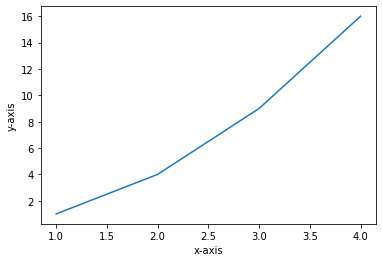

In [ ]:
from matplotlib import pyplot as plt

x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y)
plt.show() ## not strictly necessary in interactive mode (as ipython or jupyter notebooks)

Instead of a diagram (line plot), we can also make a **scatter plot**:

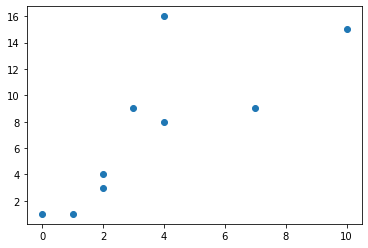

In [ ]:
x = np.array([1, 2, 3, 4, 0, 2, 7, 4, 10])
y = np.array([1, 4, 9, 16, 1, 3, 9, 8, 15])
plt.scatter(x,y)

For categorical data, a **barplot** can be used:

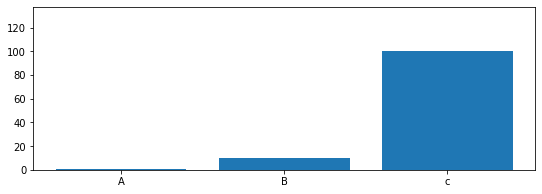

In [ ]:
names = ['A', 'B', 'c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.plot(131)
plt.bar(names, values)
plt.show()

We can plot a distribution from synthetic data using a **histogram**:

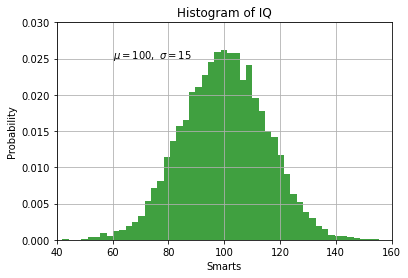

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

You can also plot directly from a Pandas dataframe:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-1.251350,-0.044613,-0.095085,1.569222
1,-2.049971,-0.170851,-0.351384,-0.952579
2,0.898424,0.206419,0.105017,0.748168
3,0.520364,0.218086,0.417163,0.102882
4,2.017736,-0.174448,-0.496642,3.150813
...,...,...,...,...
995,0.302767,-0.186049,1.673362,1.026622
996,0.355116,0.074642,-0.535387,-0.041433
997,-0.731787,-0.868482,-1.239900,-1.472321
998,-0.210806,0.031421,0.072479,0.097377


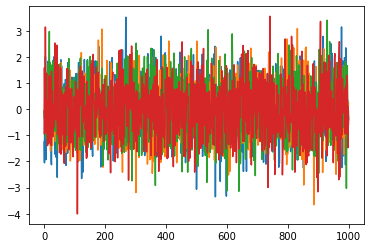

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
df = df.cumsum() ## cumulative sums per columns
df

,A,B,C,D
0,-1.251350,-0.044613,-0.095085,1.569222
1,-3.301321,-0.215464,-0.446469,0.616643
2,-2.402897,-0.009045,-0.341452,1.364811
3,-1.882533,0.209041,0.075711,1.467693
4,0.135203,0.034593,-0.420931,4.618506
...,...,...,...,...
995,8.146141,-23.999563,-6.319913,-18.183633
996,8.501256,-23.924921,-6.855300,-18.225066
997,7.769469,-24.793403,-8.095200,-19.697387
998,7.558663,-24.761982,-8.022721,-19.600010


<Figure size 432x288 with 0 Axes>

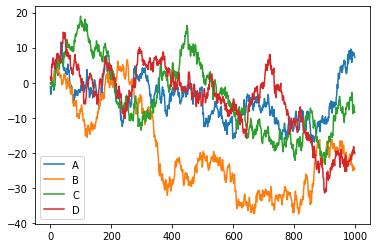

In [ ]:
plt.figure()
df.plot()

In Pandas, plot functions can be called directly on dataframes, e.g. using the function `plot.bar()` (we saw an example earlier with `df.plot()`)

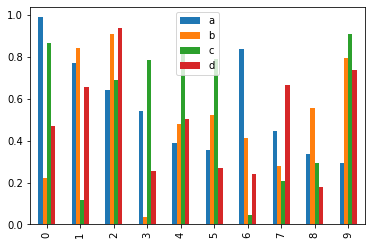

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

More on `matplotlib` <a href='https://matplotlib.org/tutorials/introductory/pyplot.html'>here</a>

## Exercise 0.1: do-it-yourself!

Now it is your turn to put together what you just learnt:

1. create a numpy array or a pandas dataframe (or a combination of both)
2. plot the data

In [ ]:
## your code here